<a href="https://colab.research.google.com/github/rzunick/MNA-Vision-Computacional-Equipo-18/blob/main/2_6_Algoritmos_de_Mejoramiento_de_Imagen_Equipo_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión Computacional para Imágenes y Video**
Tecnológico de Monterrey

Dr. Gilberto Ochoa Ruiz

##**Semana 2: Actividad 2 Algoritmos de mejoramiento de imágenes basado por pixeles**


##**Equipo 18**
**Integrantes del equipo:** 
* Ronald David Zuniga Sanchez - A01686240

# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [52]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2
from matplotlib.pyplot import figure

In [1]:
#Código para importar carpeta de imágenes en Git-Hub
!git clone https://github.com/rzunick/MNA-Vision-Computacional-Equipo-18.git

# Modificar las rutas locales incluyendo: /content/MNA-Vision-Computacional-Equipo-18/

Cloning into 'MNA-Vision-Computacional-Equipo-18'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 57 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), 14.47 MiB | 6.70 MiB/s, done.


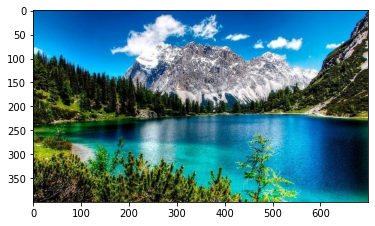

In [5]:
original_image = Image.open('/content/MNA-Vision-Computacional-Equipo-18/data/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img.npy', original_image)

#Load the image
original_image = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img.npy')

In [6]:
type(original_image)

numpy.ndarray

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image. 

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

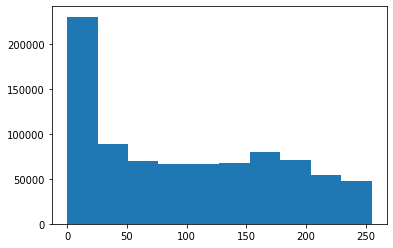

In [7]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

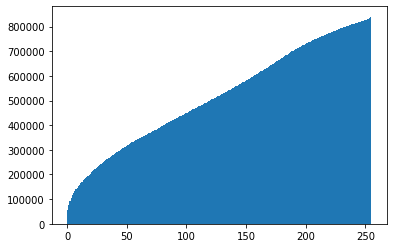

In [8]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


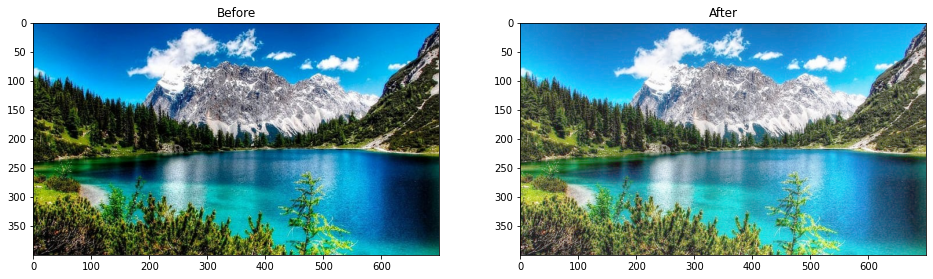

In [9]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

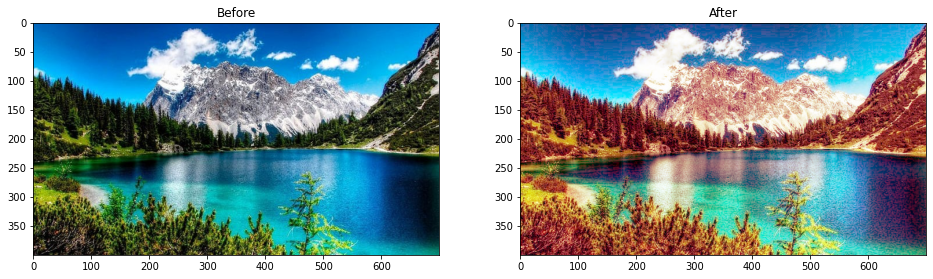

In [10]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

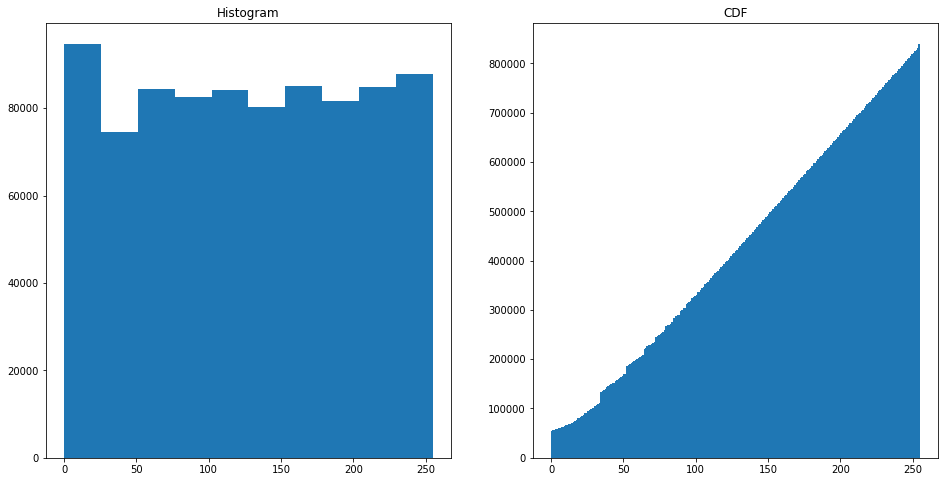

In [11]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

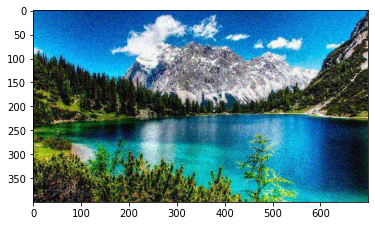

In [12]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

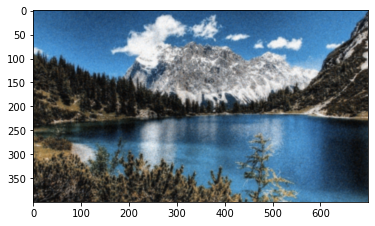

In [13]:
img3_gauss = gauss(img_n, sigma=1)   
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

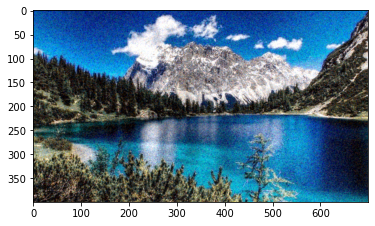

In [14]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [16]:
!pip install image_slicer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from image_slicer import slice

n = 4
slice('/content/MNA-Vision-Computacional-Equipo-18/data/image.jpg', n)

(<Tile #1 - image_01_01.png>,
 <Tile #2 - image_01_02.png>,
 <Tile #3 - image_02_01.png>,
 <Tile #4 - image_02_02.png>)

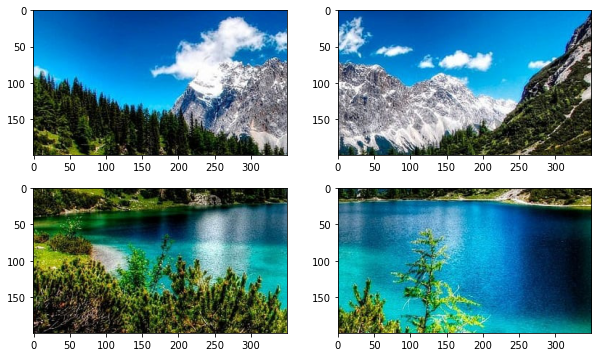

In [19]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img1 = Image.open(f'/content/MNA-Vision-Computacional-Equipo-18/data/image_01_01.png')
plt.imshow(img1)

plt.subplot(2,2,2)
img2 = Image.open(f'/content/MNA-Vision-Computacional-Equipo-18/data/image_01_02.png')
plt.imshow(img2)

plt.subplot(2,2,3)
img3 = Image.open(f'/content/MNA-Vision-Computacional-Equipo-18/data/image_02_01.png')
plt.imshow(img3)

plt.subplot(2,2,4)
img4 = Image.open(f'/content/MNA-Vision-Computacional-Equipo-18/data/image_02_02.png')
plt.imshow(img4)

plt.show()

In [22]:
# Save the image
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img1.npy', img1)
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img2.npy', img2)
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img3.npy', img3)
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img4.npy', img4)
#Load the image
img1_np = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img1.npy')
img2_np = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img2.npy')
img3_np = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img3.npy')
img4_np = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img4.npy')

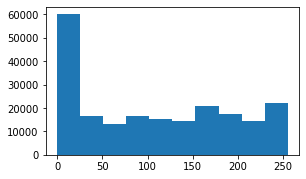

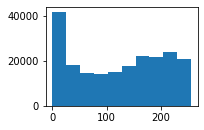

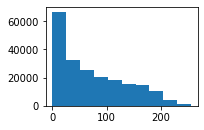

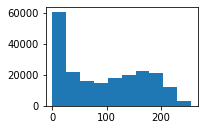

In [28]:
#Plot original histograms per picture

fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.hist(img1_np.ravel())
plt.show()

plt.subplot(2,2,2)
plt.hist(img2_np.ravel())
plt.show()

plt.subplot(2,2,3)
plt.hist(img3_np.ravel())
plt.show()

plt.subplot(2,2,4)
plt.hist(img4_np.ravel())
plt.show()

plt.show()

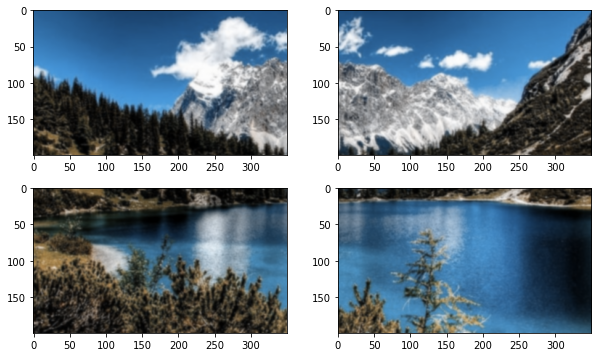

In [30]:
#Plot equalized images with Gaussian Method

fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img1_eq = gauss(img1, sigma=1) 
plt.imshow(img1_eq)

plt.subplot(2,2,2)
img2_eq = gauss(img2, sigma=1) 
plt.imshow(img2_eq)

plt.subplot(2,2,3)
img3_eq = gauss(img3, sigma=1) 
plt.imshow(img3_eq)

plt.subplot(2,2,4)
img4_eq = gauss(img4, sigma=1) 
plt.imshow(img4_eq)

plt.show()

In [33]:
# Save the image
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img1.npy', img1_eq)
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img2.npy', img2_eq)
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img3.npy', img3_eq)
np.save('/content/MNA-Vision-Computacional-Equipo-18/data/img4.npy', img4_eq)
#Load the image
img1_np = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img1.npy')
img2_np = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img2.npy')
img3_np = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img3.npy')
img4_np = np.load('/content/MNA-Vision-Computacional-Equipo-18/data/img4.npy')

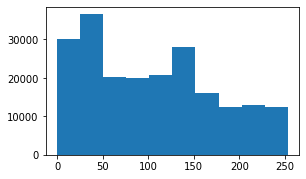

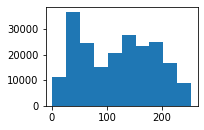

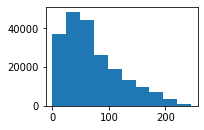

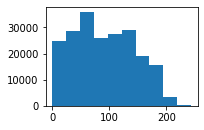

In [34]:
#Plot new histograms per picture

fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.hist(img1_np.ravel())
plt.show()

plt.subplot(2,2,2)
plt.hist(img2_np.ravel())
plt.show()

plt.subplot(2,2,3)
plt.hist(img3_np.ravel())
plt.show()

plt.subplot(2,2,4)
plt.hist(img4_np.ravel())
plt.show()

plt.show()

#**Ejercicio 1** (David)
Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

#**Ejercicio 2** (David)
Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.

#**Ejercicio 3** (Ronald)
Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.

<class 'numpy.ndarray'>


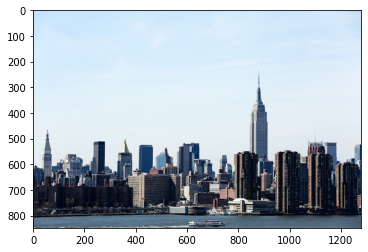

In [35]:
#Grabamos la ruta a la imagen
path_3 = "/content/MNA-Vision-Computacional-Equipo-18/data/city.jpg"

#Leemos la imagen
imgColor = cv2.imread(path_3,1)

img1 = mpimg.imread(path_3)
plt.imshow(img1)
print(type(img1))

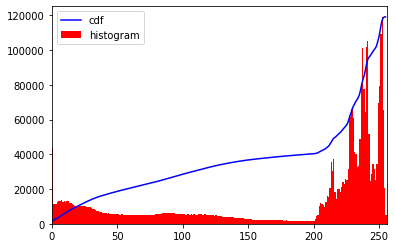

In [38]:
#Creamos histogramas a partir de la imagen
hist,bins = np.histogram(img1.flatten(),256,[0,256])

#Calculamos métrica CDF (cumulative distribution function) que muestra la intensidad acumulada de pixeles en frecuencias de 0 a 255.
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

#Desplegamos histograma y métrica CDF
plt.plot(cdf_normalized, color = 'b')
plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


Se observa un histograma desbalanceado con mayor cantidad de pixeles en los bins superiores (más brillantes).

## Equalización Básica

OpenCV tiene una función básica de equalización de histogramas para imágenes en escala de grises.

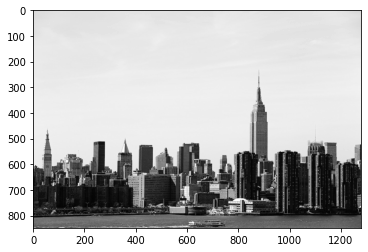

In [55]:
#Importamośla imagen en escala de grises
img_color = cv2.imread(path_3)
img1 = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap='gray')

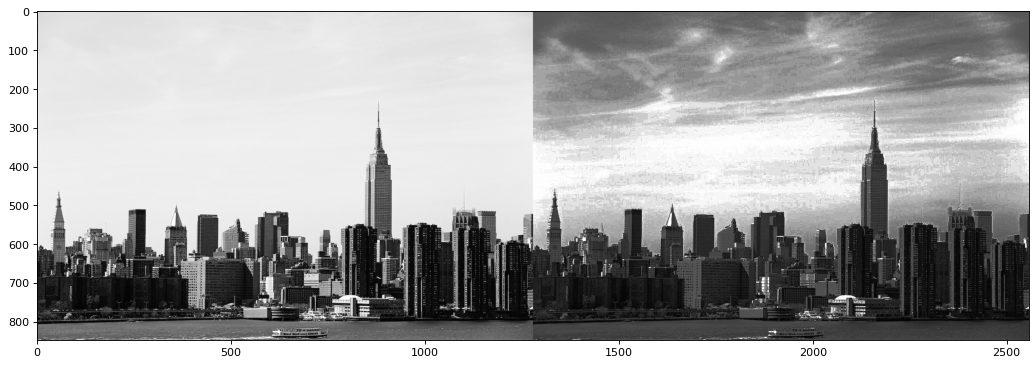

In [54]:
#Creamos comparación de imágenes con función de equalización de histogramas básico de OpenCV

equ = cv2.equalizeHist(img1)

#Montaje de comparativa de imagenes
res = np.hstack((img1,equ)) 
cv2.imwrite('res.png',res)

figure(figsize=(16, 10), dpi=80)

plt.imshow(res, cmap = 'gray')

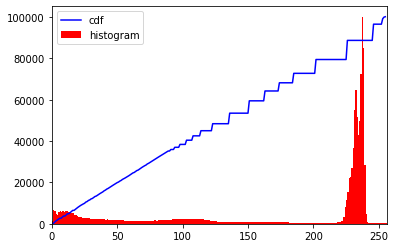

In [60]:
#Creamos histogramas a partir de la imagen
hist,bins = np.histogram(equ.flatten(),256,[0,256])

#Calculamos métrica CDF (cumulative distribution function) que muestra la intensidad acumulada de pixeles en frecuencias de 0 a 255.
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

#Desplegamos histograma y métrica CDF
plt.plot(cdf_normalized, color = 'b')
plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


##Equalización CLAHE 

CLAHE es una técnica de procesamiento de imágenes que mejora el contraste en las áreas oscuras o con poca iluminación de una imagen. Lo hace dividiendo la imagen en pequeñas partes y aplicando una ecualización de contraste solo a esas partes, en lugar de hacerlo en toda la imagen. Esto ayuda a preservar los detalles originales de la imagen mientras se mejora el contraste.

El método divide la imagen en pequeñas regiones, llamadas "células", y luego aplica una ecualización de histograma local a cada célula para mejorar el contraste. El proceso se realiza de manera iterativa hasta que se alcance un equilibrio entre la mejora del contraste y la preservación de los detalles originales de la imagen. Es útil en aplicaciones como la medicina, la seguridad, la cartografía y la astronomía.

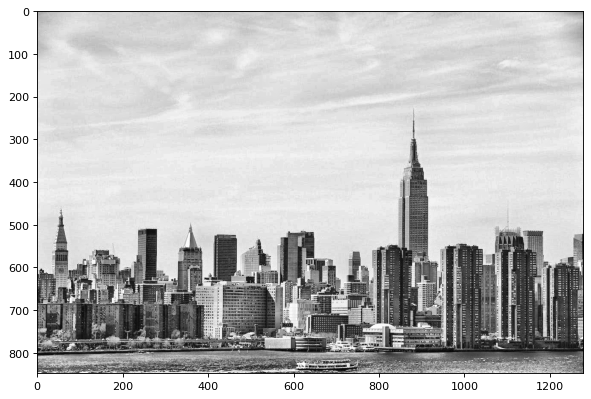

In [81]:
#Cargar imagen
img = cv2.imread(path_3,0)

# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(15,15))

#Aplicar CLAHE a la imagen
cl1 = clahe.apply(img)

#Mostrar imagen procesada
cv2.imwrite('clahe_2.jpg',cl1)
figure(figsize=(10, 6), dpi=80)
plt.imshow(cl1, cmap = 'gray')

Utilizamos la librería OpenCV para cargar y mostrar la imagen. El objeto clahe es creado utilizando la función createCLAHE y se establece el límite de clip en 2.0 y el tamaño de la rejilla en (8, 8). Luego, se aplica el objeto CLAHE a la imagen utilizando el método apply(). Finalmente se muestra la imagen original y la imagen procesada con el método CLAHE.

Nota: En este caso, la imagen se carga en escala de grises para que solo se aplique la ecualización a un solo canal, en caso de querer aplicarlo a una imagen RGB se debe pasar la imagen sin escala de grises.

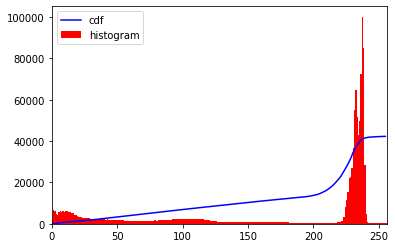

In [82]:
#Creamos histogramas a partir de la imagen
hist,bins = np.histogram(cl1.flatten(),256,[0,256])

#Calculamos métrica CDF (cumulative distribution function) que muestra la intensidad acumulada de pixeles en frecuencias de 0 a 255.
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

#Desplegamos histograma y métrica CDF
plt.plot(cdf_normalized, color = 'b')
plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

**Notas sobre el ajuste de parámetros CLAHE**

1.   El parámetro **clipLimit** es utilizado en el objeto CLAHE para establecer un límite superior para el contraste en cada célula. Este parámetro se utiliza para evitar que algunas células tengan un contraste excesivo y distorsionen la imagen.

  El valor del parámetro clipLimit indica cuánto se permite que el contraste de cada célula se desvíe de la distribución original de niveles de gris. Por ejemplo, si el clipLimit es establecido en 2.0, significa que el contraste máximo permitido en cada célula no puede ser más de dos veces el contraste original.

  Un valor más alto para clipLimit permitirá un contraste más alto, mientras que un valor más bajo resultará en un contraste más bajo. Sin embargo, un valor demasiado bajo puede no mejorar el contraste de la imagen de manera significativa, mientras que un valor demasiado alto puede distorsionar la imagen y provocar que se pierdan detalles. Por lo tanto, es importante ajustar el valor del parámetro clipLimit de manera adecuada para lograr el mejor equilibrio entre mejora del contraste y preservación de los detalles originales de la imagen.

2.   El parámetro **tileGridSize** se utiliza en el objeto CLAHE para establecer el tamaño de la rejilla de células utilizada para dividir la imagen.

  La imagen es dividida en celdas (tiles) con un tamaño especificado por tileGridSize, y el contraste se ecualiza en cada célula individualmente.

  El valor del parámetro tileGridSize se especifica como una tupla de dos números, que indican el número de células en la dirección x e y respectivamente. Por ejemplo, si el tileGridSize es establecido en (8, 8), significa que la imagen se divide en 8 células en la dirección x y 8 células en la dirección y.

  Un valor más alto para tileGridSize resultará en menos células y, por lo tanto, una mayor ecualización de contraste en cada célula. Un valor más bajo resultará en más células y una menor ecualización de contraste en cada célula. Sin embargo, un valor demasiado bajo puede no mejorar el contraste de la imagen de manera significativa, mientras que un valor demasiado alto puede distorsionar la imagen y provocar que se pierdan detalles. Por lo tanto, es importante ajustar el valor del parámetro tileGridSize de manera adecuada para lograr el mejor equilibrio entre mejora del contraste y preservación de los detalles originales de la imagen.



##Referencias

*   OpenCV: Histograms - 2: Histogram Equalization. (2023). Retrieved 27 January 2023, from https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html
*   CLAHE Histogram Equalization - OpenCV - GeeksforGeeks. (2020). Retrieved 27 January 2023, from https://www.geeksforgeeks.org/clahe-histogram-eqalization-opencv/
*   Python OpenCV: Converting an image to gray scale - techtutorialsx. (2018). Retrieved 27 January 2023, from https://techtutorialsx.com/2018/06/02/python-opencv-converting-an-image-to-gray-scale/

